In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv(r"/content/diabetes_prediction_dataset.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())



   gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  Outcome  
0          6.6                  140         0        0  
1          6.6                   80         0        0  
2          5.7                  158         0        0  
3          5.0                  155         0        0  
4          4.8                  155         0        0  


In [ ]:
# Step 2: Preprocess the data
# Assuming the last column is the target (Outcome) and others are features
X = df.drop(columns=["Outcome","smoking_history", "gender" ])# Adjust 'Outcome' if your target column has a different name

y = df['Outcome']

# Split data into training and validation sets (80% train, 20% validate)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("x.head\n",X.head())
print("y.head\n",y.head())


x.head
     age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level   
0  80.0             0              1  25.19          6.6                  140  \
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  
0         0  
1         0  
2         0  
3         0  
4         0  
y.head
 0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64


In [ ]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)




In [ ]:
# Step 3: Build and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")



Validation Accuracy: 100.00%


In [ ]:
# Step 5: Test the model using user input
def get_user_input():
    print("Please enter the following values for prediction:")
    feature_names = X.columns
    #feature_names.drop(columns=["diabetes" ])
    user_data = []
    for feature in feature_names:
        value = float(input(f"Enter {feature}: "))
        user_data.append(value)

    # Convert to a numpy array
    user_data = np.array([user_data])

    # Standardize the user input data (based on the training data)
    user_data_scaled = scaler.transform(user_data)

    return user_data_scaled

# Get user input data
user_data = get_user_input()



Please enter the following values for prediction:
Enter age: 39
Enter hypertension: 0
Enter heart_disease: 0
Enter bmi: 51
Enter HbA1c_level: 1
Enter blood_glucose_level: 90
Enter diabetes: 0


C:\Users\Sarveshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Step 6: Predict based on user input
prediction = model.predict(user_data)
predicted_class = int(prediction[0])

# Output the result
if predicted_class == 1:
    print("Prediction: The person is likely to have diabetes.")
else:
    print("Prediction: The person is unlikely to have diabetes.")


Prediction: The person is unlikely to have diabetes.


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv(r"/content/diabetes_prediction_dataset.csv")

# Display the first few rows of the dataset to understand its structure
print(df.head())


# Step 2: Preprocess the data
# Assuming the last column is the target (Outcome) and others are features
X = df.drop(columns=["Outcome","smoking_history", "gender" ])# Adjust 'Outcome' if your target column has a different name

y = df['Outcome']

# Split data into training and validation sets (80% train, 20% validate)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("x.head\n",X.head())
print("y.head\n",y.head())

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



# Step 3: Build and train the SVM model
model = SVC(kernel='linear') # You can experiment with different kernels (e.g., 'rbf', 'poly')
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


# Step 5: Test the model using user input
def get_user_input():
    print("Please enter the following values for prediction:")
    feature_names = X.columns
    #feature_names.drop(columns=["diabetes" ])
    user_data = []
    for feature in feature_names:
        value = float(input(f"Enter {feature}: "))
        user_data.append(value)

    # Convert to a numpy array
    user_data = np.array([user_data])

    # Standardize the user input data (based on the training data)
    user_data_scaled = scaler.transform(user_data)

    return user_data_scaled

# Get user input data
user_data = get_user_input()


# Step 6: Predict based on user input
prediction = model.predict(user_data)
predicted_class = int(prediction[0])

# Output the result
if predicted_class == 1:
    print("Prediction: The person is likely to have diabetes.")
else:
    print("Prediction: The person is unlikely to have diabetes.")

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  Outcome  
0          6.6                  140         0        0  
1          6.6                   80         0        0  
2          5.7                  158         0        0  
3          5.0                  155         0        0  
4          4.8                  155         0        0  
x.head
     age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6     

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: Include
# SVM method
# Decision tree

from sklearn.tree import DecisionTreeClassifier

# ... (Your existing code for data loading and preprocessing) ...

# Step 3: Build and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Decision Tree Validation Accuracy: {accuracy * 100:.2f}%")

# ... (Your existing code for user input and prediction) ...

# Step 6: Predict based on user input (Decision Tree)
prediction = model.predict(user_data)
predicted_class = int(prediction[0])

# Output the result
if predicted_class == 1:
    print("Decision Tree Prediction: The person is likely to have diabetes.")
else:
    print("Decision Tree Prediction: The person is unlikely to have diabetes.")

Decision Tree Validation Accuracy: 100.00%
Decision Tree Prediction: The person is unlikely to have diabetes.


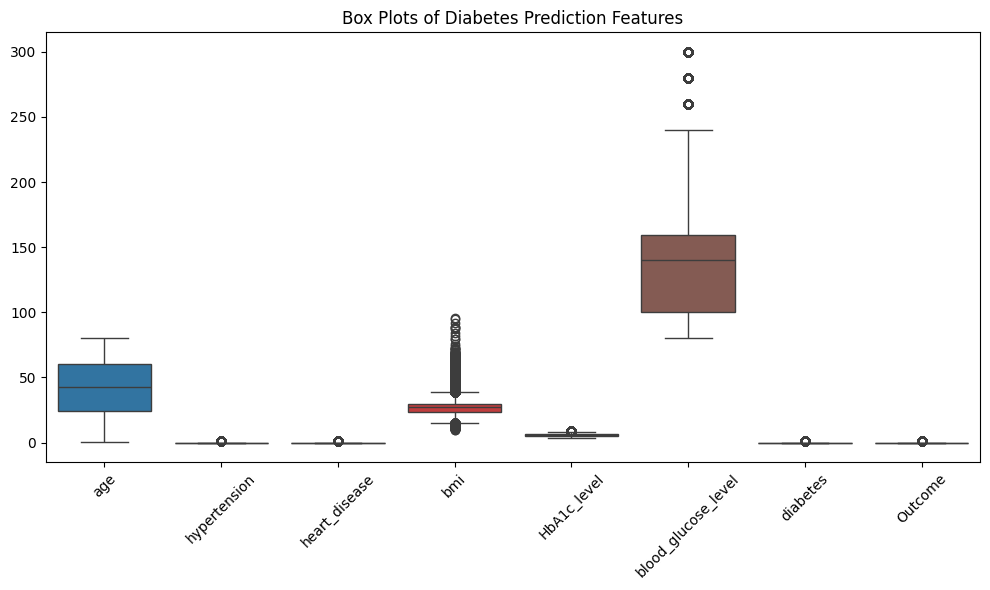

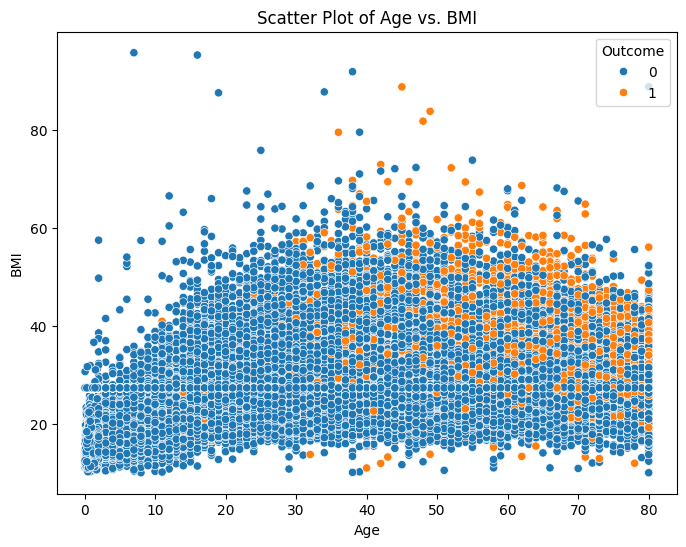

In [ ]:
# prompt: Box plot
# Scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (loaded as in your provided code)

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["smoking_history", "gender"]))  # Exclude non-numeric columns
plt.title("Box Plots of Diabetes Prediction Features")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Scatter plot (example with two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="bmi", hue="Outcome", data=df)
plt.title("Scatter Plot of Age vs. BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()


# You can create more scatter plots by replacing "age" and "bmi"
# with other pairs of features from your dataset. For example:

# sns.scatterplot(x="glucose_level", y="blood_pressure", hue="Outcome", data=df)

# Also, consider exploring pair plots for multiple scatter plot combinations at once:
# sns.pairplot(df, hue="Outcome", vars=['age', 'bmi', 'glucose_level', 'blood_pressure'])  # Add more variables as needed